<a href="https://colab.research.google.com/github/ShamsJarrar/Forest-Cover-Type-Classification/blob/main/Forest_Cover_Type.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reading Data and Visualizing Data

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('/content/covtype.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [ ]:
data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [ ]:
data.isnull().sum()

,0
Elevation,0
Aspect,0
Slope,0
Horizontal_Distance_To_Hydrology,0
Vertical_Distance_To_Hydrology,0
Horizontal_Distance_To_Roadways,0
Hillshade_9am,0
Hillshade_Noon,0
Hillshade_3pm,0
Horizontal_Distance_To_Fire_Points,0


In [ ]:
data['Cover_Type'].value_counts()

,count
Cover_Type,
2,283301
1,211840
3,35754
7,20510
6,17367
5,9493
4,2747


The data doesn't have any null values that need to be handled, nor any categorical data.

There are 7 unique classes, and it can be seen that the data set is not balanced, as not all classes have near equal number of instances.

### Converting one hot encoded data to ordinal encoding for better visualization and correlation analysis

In [ ]:
def convert_to_ordinal(df, col, new_name, ln):
  for index in range(len(df)):
    for i in range(1, ln+1):
      if df[col+f'{i}'][index] == 1:
        df[new_name][index] = i
        break

In [ ]:
# converting soil type enconding to ordinal encoding
# for data visualization and later use

data['ordinal_soil_type'] = 0
convert_to_ordinal(data, 'Soil_Type', 'ordinal_soil_type', 40)

data.head()

Streaming output truncated to the last 5000 lines.

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[new_name][index] = i
<ipython-input-9-c97b00b0d1fd>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a sin

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type,ordinal_soil_type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,29
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,29
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,12
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,30
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,29


In [ ]:
data['Soil_Type29'].head()

,Soil_Type29
0,1
1,1
2,0
3,0
4,1


In [ ]:
len(data[data['ordinal_soil_type'] == 29]), data['Soil_Type29'].value_counts()

(115247,
 Soil_Type29
 0    465765
 1    115247
 Name: count, dtype: int64)

In [ ]:
# converting wilderness area too
data['ordinal_wilderness'] = 0
convert_to_ordinal(data, 'Wilderness_Area', 'ordinal_wilderness', 4)

data.head()

Streaming output truncated to the last 5000 lines.

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[new_name][index] = i
<ipython-input-9-c97b00b0d1fd>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a sin

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type,ordinal_soil_type,ordinal_wilderness
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,29,1
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,29,1
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,12,1
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,30,1
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,29,1


In [ ]:
data['Wilderness_Area1'].head()

,Wilderness_Area1
0,1
1,1
2,1
3,1
4,1


In [ ]:
len(data[data['Wilderness_Area1'] == 1]), len(data[data['ordinal_wilderness'] == 1])

(260796, 260796)

### Visualizing Data

In [ ]:
import matplotlib.pyplot as plt
cols = list()
for col in data.columns:
  if ('Soil_Type' not in col) and ('Wilderness_Area' not in col):
    cols.append(col)

data_dropped = data[cols].copy()
data_dropped

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type,ordinal_soil_type,ordinal_wilderness
0,2596,51,3,258,0,510,221,232,148,6279,5,29,1
1,2590,56,2,212,-6,390,220,235,151,6225,5,29,1
2,2804,139,9,268,65,3180,234,238,135,6121,2,12,1
3,2785,155,18,242,118,3090,238,238,122,6211,2,30,1
4,2595,45,2,153,-1,391,220,234,150,6172,5,29,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,3,2,3
581008,2391,152,19,67,12,95,240,237,119,845,3,2,3
581009,2386,159,17,60,7,90,236,241,130,854,3,2,3
581010,2384,170,15,60,5,90,230,245,143,864,3,2,3


In [ ]:
data_dropped.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type,ordinal_soil_type,ordinal_wilderness
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,2.051471,24.362443,2.114462
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,1.396504,9.485405,1.061295
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,1.000000,20.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,2.000000,29.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,2.000000,31.000000,3.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,7.000000,40.000000,4.000000


array([[<Axes: title={'center': 'Elevation'}>,
        <Axes: title={'center': 'Aspect'}>,
        <Axes: title={'center': 'Slope'}>,
        <Axes: title={'center': 'Horizontal_Distance_To_Hydrology'}>],
       [<Axes: title={'center': 'Vertical_Distance_To_Hydrology'}>,
        <Axes: title={'center': 'Horizontal_Distance_To_Roadways'}>,
        <Axes: title={'center': 'Hillshade_9am'}>,
        <Axes: title={'center': 'Hillshade_Noon'}>],
       [<Axes: title={'center': 'Hillshade_3pm'}>,
        <Axes: title={'center': 'Horizontal_Distance_To_Fire_Points'}>,
        <Axes: title={'center': 'Cover_Type'}>,
        <Axes: title={'center': 'ordinal_soil_type'}>],
       [<Axes: title={'center': 'ordinal_wilderness'}>, <Axes: >,
        <Axes: >, <Axes: >]], dtype=object)

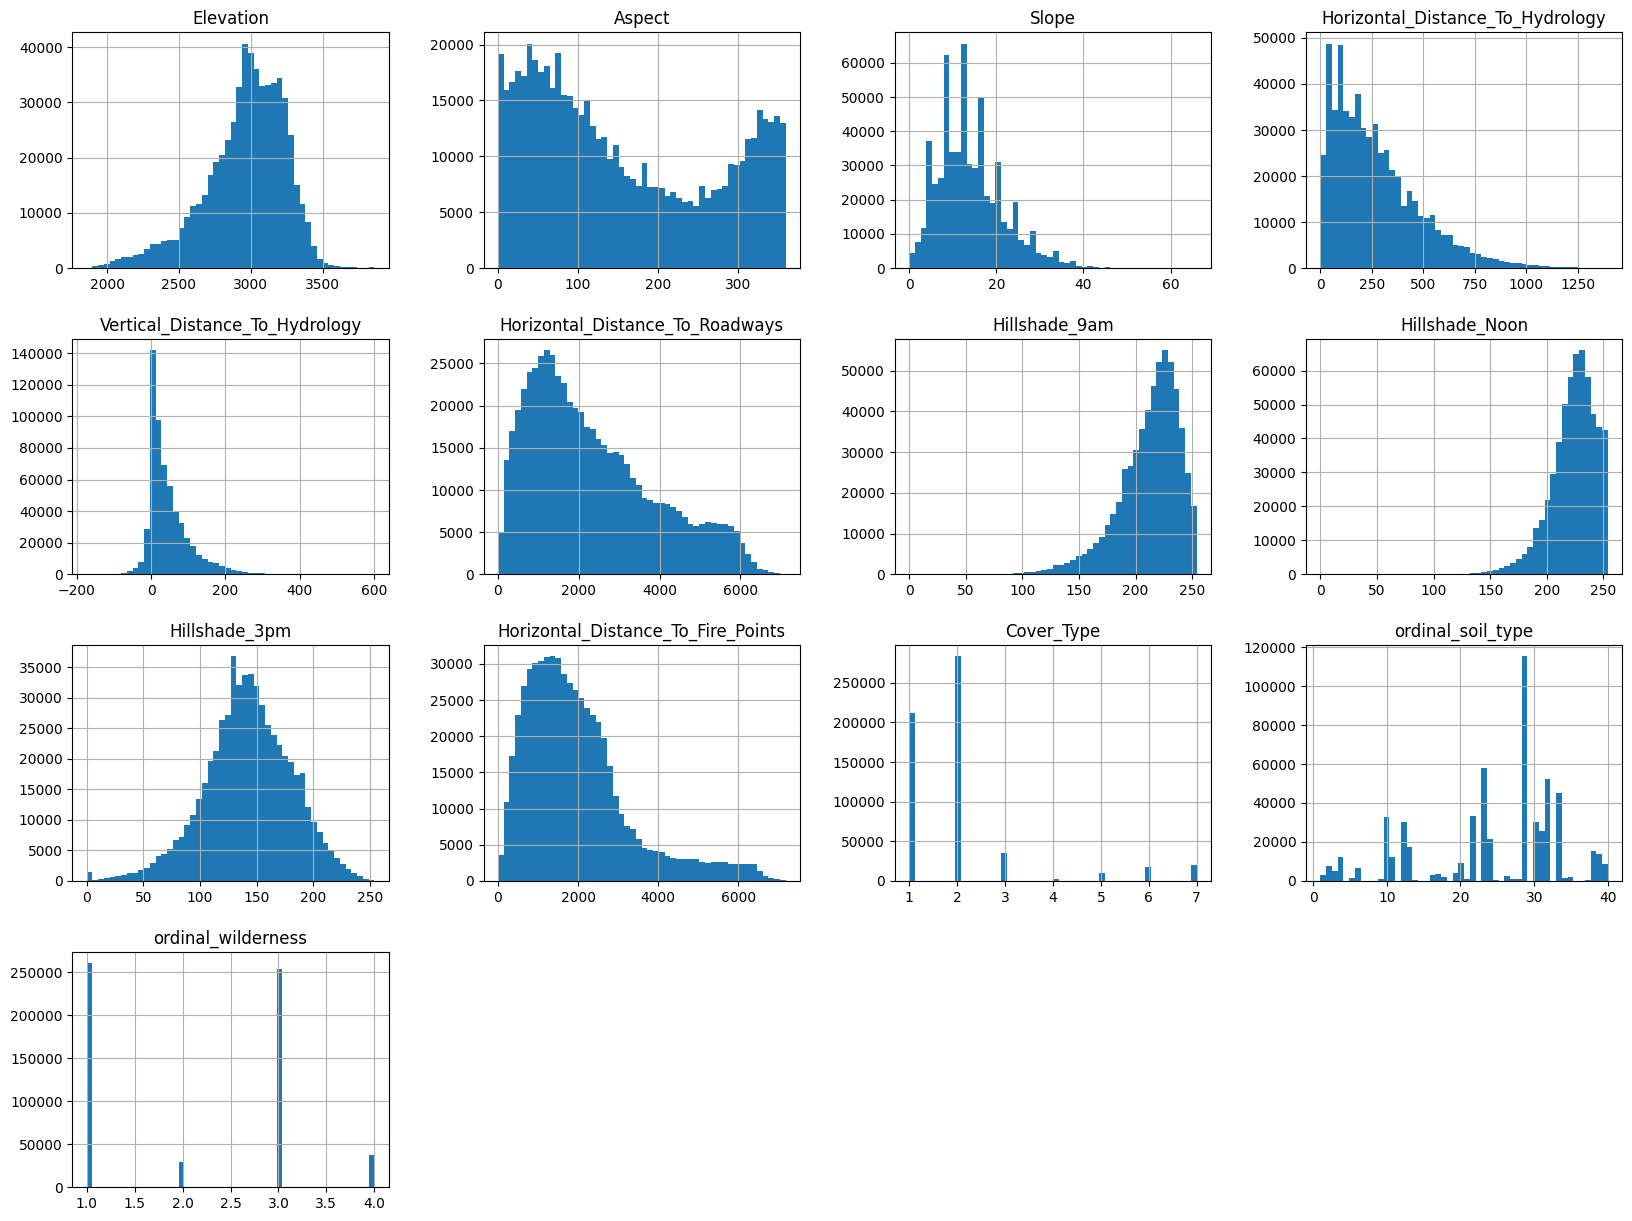

In [ ]:
data_dropped.hist(bins=50, figsize=(20,15))

- Most numerical data does have normal a near normal distribution, except for Aspect feature. (meaning having a defined structure)
- In addition, most distributions are skewed to one side more than the other
- Data distribution is categorical is unbalanced, having a class represented more than the other classes. -> they can be used in startified splitting for better evaluation, or undersampling and oversampling can be used, but might ruin data due to having many classes.

# Creating training and test sets

The original data columns with the one hot encoding will be used, since representing data with ordinal encoding could lead to misinterpretation by different models, and the data doesn't represent rank, order, or level.

### Normal Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

Ntrain_set, Ntest_set = train_test_split(data, test_size=0.2, random_state=42)

len(Ntrain_set), len(Ntest_set)

(464809, 116203)

### Stratified Train-Test split

In [ ]:
# Soil type will be used for stratified splitting since the disparity between
# classes is higher than wilderness area

from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for tr_index, te_index in split.split(data, data['ordinal_soil_type']):
  Strain_set = data.loc[tr_index]
  Stest_set = data.loc[te_index]

In [ ]:
# checking if data is distibuted correctly
data['ordinal_soil_type'].value_counts() / len(data)

,count
ordinal_soil_type,
29,0.198356
23,0.099399
32,0.090392
33,0.077716
22,0.057439
10,0.056168
30,0.051927
12,0.051584
31,0.044175


In [ ]:
Strain_set['ordinal_soil_type'].value_counts() / len(Strain_set)

,count
ordinal_soil_type,
29,0.198357
23,0.099400
32,0.090392
33,0.077716
22,0.057439
10,0.056167
30,0.051927
12,0.051585
31,0.044175


In [ ]:
Stest_set['ordinal_soil_type'].value_counts() / len(Stest_set)

,count
ordinal_soil_type,
29,0.198351
23,0.099395
32,0.090394
33,0.077717
22,0.057443
10,0.056169
30,0.051926
12,0.051582
31,0.044173


In [ ]:
Strain_set.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type,ordinal_soil_type,ordinal_wilderness
572972,2573,223,20,42,14,1315,189,254,195,451,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,4,3
17190,2673,21,33,30,10,2893,178,151,91,6423,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,16,1
60592,3004,115,12,255,45,4943,240,228,117,5880,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,30,1
28816,2707,42,7,150,34,2029,222,224,137,5372,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,29,1
430860,3022,342,8,0,0,3154,205,229,163,1024,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,23,3


# Checking for correlations, feature selection and engineering

The stratified split training set will be used to ensure representation of all soil types in the training set

In [ ]:
corr = Strain_set[cols].corr()
corr

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type,ordinal_soil_type,ordinal_wilderness
Elevation,1.000000,0.016384,-0.242173,0.306715,0.094340,0.365199,0.111801,0.206169,0.059560,0.147641,-0.269806,0.690010,-0.314821
Aspect,0.016384,1.000000,0.078384,0.017677,0.070449,0.025912,-0.579557,0.336284,0.647067,-0.109319,0.017244,0.007639,0.138257
Slope,-0.242173,0.078384,1.000000,-0.010978,0.274594,-0.216054,-0.325646,-0.526562,-0.177134,-0.184995,0.147701,-0.105555,0.285122
Horizontal_Distance_To_Hydrology,0.306715,0.017677,-0.010978,1.000000,0.606281,0.072583,-0.027364,0.047191,0.052815,0.051316,-0.020828,0.194562,0.056209
Vertical_Distance_To_Hydrology,0.094340,0.070449,0.274594,0.606281,1.000000,-0.045915,-0.165754,-0.110946,0.034424,-0.070095,0.080544,0.071740,0.187998
Horizontal_Distance_To_Roadways,0.365199,0.025912,-0.216054,0.072583,-0.045915,1.000000,0.034652,0.190105,0.106221,0.331715,-0.152550,0.240708,-0.445672
Hillshade_9am,0.111801,-0.579557,-0.325646,-0.027364,-0.165754,0.034652,1.000000,0.009940,-0.780331,0.132544,-0.035380,0.041474,-0.233557
Hillshade_Noon,0.206169,0.336284,-0.526562,0.047191,-0.110946,0.190105,0.009940,1.000000,0.594402,0.056471,-0.096378,0.014062,-0.080292
Hillshade_3pm,0.059560,0.647067,-0.177134,0.052815,0.034424,0.106221,-0.780331,0.594402,1.000000,-0.048358,-0.048218,-0.001450,0.105479
Horizontal_Distance_To_Fire_Points,0.147641,-0.109319,-0.184995,0.051316,-0.070095,0.331715,0.132544,0.056471,-0.048358,1.000000,-0.108754,0.101681,-0.417103


Notes on correlations:
- Elevation and ordinal_soil_type has a high correlation, but it also might not be indicative of causation since ordinal representation isn't for ranking or level.
- Elevation and Slope has a good correlation
- Elevation and Horizontal_Distance_To_Hyrdology, and Elevation and Horizontal_Distance_To_Roadways also has a good correlation

<br>

- Aspect has generally low correlations with most features, but high correlations with HillShade *Might drop Hillshade features*

<br>

- Slope has a good correlation also with Vertical_Distance_To_Hyrdology
- Slope has good correlations with Hillshade feature *which supports more the dropping of the features*

<br>

- Horizontal and Vertical distance to hydrology also have a high correlations *Might multiply them and add them as a new feature*
- Otherwise both features don't have high correlations with other feautures

<br>

- Horizontal_Distance_To_Roadways doesn't have significant correlations with other features except Horizontal_Distance_To_Fire_Points, which can be inferred from elevation.

<br>

- Hillshade features don't have that great correlation, but logically the amount of sun/shade an area receives does affect cover type *So features can be multiplied or added to see their effects*

<br>

- Horizontal_Distance_To_Fire_Points doesn't have alot of especially with Cover Type, but with wilderness it does. From my knowledge in Environmental Science, I know that an area with alot of wildfires does lead to difference in soil and cover. So, I think it should be added as feature and is more influential than Horizontal_Distance_To_Roadways.

<br>



In [ ]:
# copying training set to perform modifications on it
experimental_Strain = Strain_set.copy()
experimental_Strain.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type,ordinal_soil_type,ordinal_wilderness
572972,2573,223,20,42,14,1315,189,254,195,451,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,4,3
17190,2673,21,33,30,10,2893,178,151,91,6423,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,16,1
60592,3004,115,12,255,45,4943,240,228,117,5880,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,30,1
28816,2707,42,7,150,34,2029,222,224,137,5372,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,29,1
430860,3022,342,8,0,0,3154,205,229,163,1024,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,23,3


In [ ]:
# Trying to multiply distances to hydrology and adding hillshade features too
experimental_Strain['Distance_to_Hydrology'] = (experimental_Strain['Horizontal_Distance_To_Hydrology'] + experimental_Strain['Vertical_Distance_To_Hydrology']) / 2
experimental_Strain['Hillshade_Total'] = experimental_Strain['Hillshade_9am'] + experimental_Strain['Hillshade_Noon'] + experimental_Strain['Hillshade_3pm']
cols.append('Distance_to_Hydrology')
cols.append('Hillshade_Total')
corr = experimental_Strain[cols].corr()
corr

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type,ordinal_soil_type,ordinal_wilderness,Distance_to_Hydrology,Hillshade_Total
Elevation,1.000000,0.016384,-0.242173,0.306715,0.094340,0.365199,0.111801,0.206169,0.059560,0.147641,-0.269806,0.690010,-0.314821,0.280307,0.215349
Aspect,0.016384,1.000000,0.078384,0.017677,0.070449,0.025912,-0.579557,0.336284,0.647067,-0.109319,0.017244,0.007639,0.138257,0.031185,0.366631
Slope,-0.242173,0.078384,1.000000,-0.010978,0.274594,-0.216054,-0.325646,-0.526562,-0.177134,-0.184995,0.147701,-0.105555,0.285122,0.054230,-0.596777
Horizontal_Distance_To_Hydrology,0.306715,0.017677,-0.010978,1.000000,0.606281,0.072583,-0.027364,0.047191,0.052815,0.051316,-0.020828,0.194562,0.056209,0.982954,0.051209
Vertical_Distance_To_Hydrology,0.094340,0.070449,0.274594,0.606281,1.000000,-0.045915,-0.165754,-0.110946,0.034424,-0.070095,0.080544,0.071740,0.187998,0.742154,-0.122339
Horizontal_Distance_To_Roadways,0.365199,0.025912,-0.216054,0.072583,-0.045915,1.000000,0.034652,0.190105,0.106221,0.331715,-0.152550,0.240708,-0.445672,0.050558,0.201631
Hillshade_9am,0.111801,-0.579557,-0.325646,-0.027364,-0.165754,0.034652,1.000000,0.009940,-0.780331,0.132544,-0.035380,0.041474,-0.233557,-0.061382,-0.067299
Hillshade_Noon,0.206169,0.336284,-0.526562,0.047191,-0.110946,0.190105,0.009940,1.000000,0.594402,0.056471,-0.096378,0.014062,-0.080292,0.014123,0.985867
Hillshade_3pm,0.059560,0.647067,-0.177134,0.052815,0.034424,0.106221,-0.780331,0.594402,1.000000,-0.048358,-0.048218,-0.001450,0.105479,0.052470,0.671713
Horizontal_Distance_To_Fire_Points,0.147641,-0.109319,-0.184995,0.051316,-0.070095,0.331715,0.132544,0.056471,-0.048358,1.000000,-0.108754,0.101681,-0.417103,0.027043,0.064767


correlation improved for total hillshade, and an average was calculated for distance to hydrology.

In [ ]:
experimental_Strain = experimental_Strain.drop(columns = ['Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm'])

In [ ]:
corr['Cover_Type'].sort_values(ascending=False)

,Cover_Type
Cover_Type,1.000000
ordinal_wilderness,0.275597
Slope,0.147701
Vertical_Distance_To_Hydrology,0.080544
Aspect,0.017244
Distance_to_Hydrology,0.001067
Horizontal_Distance_To_Hydrology,-0.020828
Hillshade_9am,-0.035380
Hillshade_3pm,-0.048218
Hillshade_Noon,-0.096378


In [ ]:
# Aspect and Distance to roadway will be dropped
# since they don't have that great of an effect on
# Cover_Type, and distance to roadway is simply redundant
# as it has high correlations with other data that was kept

# in addition to ordinal encoded data

experimental_Strain = experimental_Strain.drop(columns = ['Aspect', 'Horizontal_Distance_To_Roadways', 'ordinal_soil_type', 'ordinal_wilderness'])

In [ ]:
experimental_Strain.columns

Index(['Elevation', 'Slope', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40',
       'Cover_Type', 'Distance_to_Hydrology', 'Hillshade_Total'],
      dtype='object')

In [ ]:
experimental_Strain_label = experimental_Strain['Cover_Type'].copy()
experimental_Strain = experimental_Strain.drop(columns = ['Cover_Type'])

### Creating experimental test set too

In [ ]:
experimental_Stest = Stest_set.copy()

In [ ]:
experimental_Stest['Distance_to_Hydrology'] = (experimental_Stest['Horizontal_Distance_To_Hydrology'] + experimental_Stest['Vertical_Distance_To_Hydrology']) / 2
experimental_Stest['Hillshade_Total'] = experimental_Stest['Hillshade_9am'] + experimental_Stest['Hillshade_Noon'] + experimental_Stest['Hillshade_3pm']

In [ ]:
experimental_Stest = experimental_Stest.drop(columns = ['Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm'])

In [ ]:
experimental_Stest = experimental_Stest.drop(columns = ['Aspect', 'Horizontal_Distance_To_Roadways', 'ordinal_soil_type', 'ordinal_wilderness'])

In [ ]:
experimental_Stest_label = experimental_Stest['Cover_Type'].copy()
experimental_Stest = experimental_Stest.drop(columns = ['Cover_Type'])

### Separating original training and test set into labels

In [ ]:
Strain_set_label = Strain_set['Cover_Type'].copy()
Strain_set = Strain_set.drop(columns = ['Cover_Type'])

In [ ]:
Stest_set_label = Stest_set['Cover_Type'].copy()
Stest_set = Stest_set.drop(columns = ['Cover_Type'])

In [ ]:
Strain_set.drop(columns =['ordinal_soil_type',
       'ordinal_wilderness'], inplace = True)
Stest_set.drop(columns =['ordinal_soil_type',
       'ordinal_wilderness'], inplace = True)

# Creating Scaled data for models that require scaling

Standardization will be used since data is exactly normally distributed, so standardization is better across the board

In [ ]:
experimental_Strain.columns

Index(['Elevation', 'Slope', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40',
       'Distance_to_Hydrology', 'Hillshade_Total'],
      dtype='object')

In [ ]:
# defining columns that needs scaling
to_scale = ['Elevation', 'Slope', 'Horizontal_Distance_To_Fire_Points', 'Distance_to_Hydrology', 'Hillshade_Total']

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

scaler = ColumnTransformer([('scaler', StandardScaler(), to_scale)])

scaled_experimental_Strain = scaler.fit_transform(experimental_Strain)

In [ ]:
scaled_experimental_Stest = scaler.fit_transform(experimental_Stest)

In [ ]:
Strain_set.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

In [ ]:
# Scaling the columns of the original data
og_to_scale = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points']

og_scaler = ColumnTransformer([('scaler', StandardScaler(), og_to_scale)])

scaled_Strain_set = og_scaler.fit_transform(Strain_set)
scaled_Stest_set = og_scaler.fit_transform(Stest_set)

# Training Different Models and Evaluating their Performance

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(scaled_experimental_Strain, experimental_Strain_label)

LogisticRegression()

In [ ]:
# measuring accuracy on the training set
log_reg.score(scaled_experimental_Strain, experimental_Strain_label)

0.6920692155272381

### Hyperparameter Tuning

In [ ]:
# RandomizedSearch will be used since the number of combinations
# is very high

from sklearn.model_selection import RandomizedSearchCV

param = {
    'penalty' : ['l1', 'l2'],
    'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'max_iter' : [100, 175]
}

# penalty: regulirzation is important to ensure no overfitting occurs, so choosing the best model is important
# solver: different solver behave differently, some are better for multiclass classification, and some are
# better for large datasets like newton-cholesky, and since we have a combination of both, it is better to add it
# as part of the hyperparameter tuning process
# max_iter: determines when the model will stop converging while optimizing, and trying the default value
# and a bigger value will help us understand whether the model would need more iterations to converge
# due to the large dataset size

log_reg = LogisticRegression()
random_search = RandomizedSearchCV(log_reg, param, cv=5, n_iter = 10, scoring = 'accuracy')
random_search.fit(scaled_experimental_Strain, experimental_Strain_label)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1194, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/us

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'max_iter': [100, 175],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['lbfgs', 'liblinear',
                                                   'newton-cg',
                                                   'newton-cholesky', 'sag',
                                                   'saga']},
                   scoring='accuracy')

In [ ]:
random_search.best_params_

{'solver': 'newton-cg', 'penalty': 'l2', 'max_iter': 175}

In [ ]:
log_reg = LogisticRegression(solver = 'newton-cg', penalty = 'l2', max_iter = 175)
log_reg.fit(scaled_experimental_Strain, experimental_Strain_label)

LogisticRegression(max_iter=175, solver='newton-cg')

In [ ]:
log_reg.score(scaled_experimental_Strain, experimental_Strain_label)

0.6921208496393142

Accuracy did not improve!
### So, original training set will be used

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(scaled_Strain_set, Strain_set_label)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
log_reg.score(scaled_Strain_set, Strain_set_label)

0.6972627466335635

The accuracy is a bit better, so Hyperparameter tuning will be applied

In [ ]:
param = {
    'penalty' : ['l1', 'l2'],
    'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'max_iter' : [100, 175, 200, 230]
}

log_reg = LogisticRegression()
random_search = RandomizedSearchCV(log_reg, param, cv=5, n_iter = 10, scoring = 'accuracy')
random_search.fit(scaled_Strain_set, Strain_set_label)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1194, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'max_iter': [100, 175, 200, 230],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['lbfgs', 'liblinear',
                                                   'newton-cg',
                                                   'newton-cholesky', 'sag',
                                                   'saga']},
                   scoring='accuracy')

In [ ]:
random_search.best_params_

{'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 200}

In [ ]:
log_reg = LogisticRegression(solver = 'lbfgs', penalty = 'l2', max_iter = 200)
log_reg.fit(scaled_Strain_set, Strain_set_label)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200)

In [ ]:
log_reg.score(scaled_Strain_set, Strain_set_label)

0.6978823559784771

In [ ]:
log_reg.score(scaled_Stest_set, Stest_set_label)

0.6965138593667978

Accuracy in logistic regression is not increasing beyond 69.8%
hence, other models might be a fit

### Some evaluation metrics for the best logistic regression model yet

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

predictions = log_reg.predict(scaled_Stest_set)

# Accuracy
accuracy_score(Stest_set_label, predictions)

0.6965138593667978

In [ ]:
# Precision
precision_score(Stest_set_label, predictions, average = 'weighted')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


0.6781562196195752

In [ ]:
# Recall
recall_score(Stest_set_label, predictions, average = 'weighted')

0.6965138593667978

In [ ]:
# F1 score
f1_score(Stest_set_label, predictions, average = 'weighted')

0.6830469037407116

In [ ]:
# Confusion matrix
conf_matrix = confusion_matrix(Stest_set_label, predictions)
conf_matrix

array([[29447, 11975,     0,     0,     0,     4,   750],
       [11244, 44680,   691,     0,     0,   217,     9],
       [    0,  1569,  4841,    80,     0,   673,     0],
       [    0,     3,   375,   110,     0,    66,     0],
       [    0,  1841,     6,     0,     0,     0,     0],
       [    0,  1069,  1713,    13,     0,   721,     0],
       [ 2896,    72,     0,     0,     0,     0,  1138]])

## KNN

In [ ]:
# First the model will be trained on experimental data
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(scaled_experimental_Strain, experimental_Strain_label)

KNeighborsClassifier()

In [ ]:
scaled_experimental_Strain

array([[-1.37994295,  0.78818076, -1.15491337, -1.03077869,  1.38232002],
       [-1.02291231,  2.52512138,  3.35421183, -1.09425799, -3.64236042],
       [ 0.15885911, -0.28070577,  2.94422272, -0.06271939,  0.1607234 ],
       ...,
       [ 0.7658112 ,  0.65456994, -0.78796179,  0.64348782, -0.1850115 ],
       [ 1.03358419, -0.41431659, -0.35305621, -0.2967993 , -0.1619625 ],
       [-1.03719354,  0.65456994, -0.09709615, -0.16587325,  0.66780124]])

In [ ]:
# Calculating accuracy through prediciting on the
# training set first
knn.score(scaled_experimental_Strain, experimental_Strain_label)

0.8767429202102369

In [ ]:
# Calculating accuracy on the test set
knn.score(scaled_experimental_Stest, experimental_Stest_label)

0.8084128636954295

So, the model gave an accuracy of 80% on the test set, which means it also does well on unseen data

Since we have reached the objective, the rest is for comparison purposes and understanding to see:
- How hyperparameter tuning might actually improve the model
- If the experimental training set is better than the original training set or vice versa

### Hyperparamter Tuning

In [ ]:
# Randomized search will be used
# Since the training set is big

from sklearn.model_selection import RandomizedSearchCV

param = {
    'n_neighbors' : [3, 5, 8, 12, 16],
    'weights' : ['uniform', 'distance'],
    'metric' : ['euclidean', 'manhattan', 'minkowski']
}

# n_neighbors: the number of neighbors would most likely influence the results hence I try different values
# The values were chosen arbritarily but close to the default value which is 5
# weights: determines the weight of each neighbor, so it also weighs in the decision when the model is classifying
# metric: How distance is measured does definitely shape a different understanding for the meaning of 'neighbor'
# in each way listed above, hence putting it part of the parameter tuning is essential

knn = KNeighborsClassifier()
random_search = RandomizedSearchCV(knn, param, n_iter = 10, cv = 5, scoring = 'accuracy')
random_search.fit(scaled_experimental_Strain, experimental_Strain_label)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'metric': ['euclidean', 'manhattan',
                                                   'minkowski'],
                                        'n_neighbors': [3, 5, 8, 12, 16],
                                        'weights': ['uniform', 'distance']},
                   scoring='accuracy')

In [ ]:
random_search.best_params_

{'weights': 'distance', 'n_neighbors': 12, 'metric': 'manhattan'}

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 12, weights = 'distance', metric = 'manhattan')
knn.fit(scaled_experimental_Strain, experimental_Strain_label)

KNeighborsClassifier(metric='manhattan', n_neighbors=12, weights='distance')

In [ ]:
# checking accuracy on training set
knn.score(scaled_experimental_Strain, experimental_Strain_label)

1.0

In [ ]:
# Checking the accuracy on the
# test set to ensure the model is not overfitting

knn.score(scaled_experimental_Stest, experimental_Stest_label)

0.8253401375179642

Accuracy definitely improved, and the model does well on unseen data

### Testing on the original training set to compare results
So simply repeating everything I did above

In [ ]:
knn = KNeighborsClassifier()
knn.fit(scaled_Strain_set, Strain_set_label)

KNeighborsClassifier()

In [ ]:
knn.score(scaled_Strain_set, Strain_set_label)

0.9410080269530064

In [ ]:
knn.score(scaled_Stest_set, Stest_set_label)

0.9053466777966146

The original training set (with the dropped columns) is definitely better. Even the difference between model's accuracy on seen and unseen is only 4%.

In [ ]:
# Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV

param = {
    'n_neighbors' : [5, 8, 12, 16],
    'weights' : ['uniform', 'distance'],
    'metric' : ['euclidean', 'manhattan', 'minkowski']
}

knn = KNeighborsClassifier()
random_search = RandomizedSearchCV(knn, param, n_iter = 5, cv = 2, scoring = 'accuracy')
random_search.fit(scaled_Strain_set, Strain_set_label)

RandomizedSearchCV(cv=2, estimator=KNeighborsClassifier(), n_iter=5,
                   param_distributions={'metric': ['euclidean', 'manhattan',
                                                   'minkowski'],
                                        'n_neighbors': [5, 8, 12, 16],
                                        'weights': ['uniform', 'distance']},
                   scoring='accuracy')

It took too long for the random search to run probably due to the high number of features and instances.
I have modified the parameters for knn and the parameters for the random search decrease the overall runtime complexity

In [ ]:
random_search.best_params_

{'weights': 'distance', 'n_neighbors': 5, 'metric': 'euclidean'}

In [ ]:
knn = KNeighborsClassifier(weights = 'distance', n_neighbors = 5, metric = 'euclidean')
knn.fit(scaled_Strain_set, Strain_set_label)

KNeighborsClassifier(metric='euclidean', weights='distance')

In [ ]:
knn.score(scaled_Strain_set, Strain_set_label)

1.0

In [ ]:
knn.score(scaled_Stest_set, Stest_set_label)

0.9108887033897576

Hyperparameter tuning did definitely increase the accuracy on unseen data.
And it can be seen that the model performed better on the original training sets.

### Evaluation Metrics on the best knn model

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

predictions = knn.predict(scaled_Stest_set)

# Accuracy
accuracy_score(Stest_set_label, predictions)

0.9108887033897576

In [ ]:
# Precision
precision_score(Stest_set_label, predictions, average = 'weighted')

0.9105716295462143

In [ ]:
# Recall
recall_score(Stest_set_label, predictions, average = 'weighted')

0.9108887033897576

In [ ]:
# F1 score
f1_score(Stest_set_label, predictions, average = 'weighted')

0.9106652620036826

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(Stest_set_label, predictions)
conf_matrix

array([[38504,  3371,     7,     0,    49,    13,   232],
       [ 3159, 52880,   282,     2,   259,   221,    38],
       [    5,   367,  6295,    49,    15,   432,     0],
       [    0,     1,   115,   396,     0,    42,     0],
       [   50,   405,     9,     0,  1376,     7,     0],
       [   10,   299,   492,    27,     9,  2679,     0],
       [  352,    34,     0,     0,     2,     0,  3718]])

The model does well overall on all metrics, but this type of classification problem is accuracy based, since (true and false have the same importance), hence accuracy is the most important metric for evaluation.

## Decision Tree

In [ ]:
# As done in previous models, the
# model will be first fitted on the experimental
# training set, then the original training set

from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(experimental_Strain, experimental_Strain_label)

DecisionTreeClassifier()

In [ ]:
# Accuracy on training set
tree.score(experimental_Strain, experimental_Strain_label)

1.0

In [ ]:
# Accuracy on test set
tree.score(experimental_Stest, experimental_Stest_label)

0.8937721057115565

We can see that there is a big gap between the accuracy on trained data and unseen data.
The accuracy is still good, but the gap needs to be decreased since the model might be overfitting

### Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param ={
    "max_depth" : [10, 50, 100, 150, 200, 250],
    'max_features' : [1, 5, 15, 40, 49],          # 49 is the number of features we have, which is the default value
    'min_samples_split' : [2, 5, 10, 15]          # Greater than 15 might lead to underfitting
}

# max_depth: will ensure that the model doesn't overfit, hence it is important]
# max_features: will help in improving evaluation, since the different combinations of features
# might lead to different results
# min_samples_split: will also help in regularizing the model
# criterion will not be used, since we have a large dataset, so gini is the best currently
# for computation efficiency.

tree = DecisionTreeClassifier()
random_search = RandomizedSearchCV(tree, param, n_iter = 10, cv = 5, scoring = 'accuracy')
random_search.fit(experimental_Strain, experimental_Strain_label)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'max_depth': [10, 50, 100, 150, 200,
                                                      250],
                                        'max_features': [1, 5, 15, 40, 49],
                                        'min_samples_split': [2, 5, 10, 15]},
                   scoring='accuracy')

In [ ]:
random_search.best_params_

{'min_samples_split': 5, 'max_features': 49, 'max_depth': 50}

In [ ]:
# Training the model with the new parameters
tree = DecisionTreeClassifier(max_depth = 50, max_features = 49, min_samples_split = 5)
tree.fit(experimental_Strain, experimental_Strain_label)

DecisionTreeClassifier(max_depth=50, max_features=49, min_samples_split=5)

In [ ]:
# Accuracy on the test set
tree.score(experimental_Stest, experimental_Stest_label)

0.891001092914985

Accuracy actually decreased using hyperparameter tuning, which shows that the ranges given were not the best for the parameters, and that the default parameters are better in our case.

Due to time limitation, and that we have already achieved the objective, I will go on to train to the original data set, and will not reperform hyperparameter tuning on this training set

### Training on the original training set

In [ ]:
tree = DecisionTreeClassifier()
tree.fit(Strain_set, Strain_set_label)

DecisionTreeClassifier()

In [ ]:
# Accuracy on training set
tree.score(Strain_set, Strain_set_label)

1.0

In [ ]:
# Accuracy on test set
tree.score(Stest_set, Stest_set_label)

0.938727915802518

The model definitely does perform better on the original training set than the experimental training set

In [ ]:
# Hyperparameter Tuning
param ={
    "max_depth" : [10, 50, 100, 150, 200, 250, 400],
    'max_features' : [1, 5, 15, 20, 35, 40, 49],          # 49 is the number of features we have, which is the default value
    'min_samples_split' : [2, 5, 10, 15,]                 # Greater than 15 might lead to underfitting
}

tree = DecisionTreeClassifier()
random_search = RandomizedSearchCV(tree, param, n_iter = 10, cv = 5, scoring = 'accuracy')
random_search.fit(Strain_set, Strain_set_label)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'max_depth': [10, 50, 100, 150, 200,
                                                      250, 400],
                                        'max_features': [1, 5, 15, 20, 35, 40,
                                                         49],
                                        'min_samples_split': [2, 5, 10, 15]},
                   scoring='accuracy')

In [ ]:
random_search.best_params_

{'min_samples_split': 2, 'max_features': 40, 'max_depth': 100}

In [ ]:
tree = DecisionTreeClassifier(max_depth = 100, max_features = 40, min_samples_split = 2)
tree.fit(Strain_set, Strain_set_label)

DecisionTreeClassifier(max_depth=100, max_features=40)

In [ ]:
# Accuracy
tree.score(Stest_set, Stest_set_label)

0.9356729172224469

Accuracy also decreased after hyperparameter tuning, which shows that again the default values are the best

### Evaluation Metrics on the best decision tree model

In [ ]:
# Returning to the best model
tree = DecisionTreeClassifier()
tree.fit(Strain_set, Strain_set_label)

DecisionTreeClassifier()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

predictions = tree.predict(Stest_set)

# Accuracy
accuracy_score(Stest_set_label, predictions)

0.938736521432321

In [ ]:
# Precision
precision_score(Stest_set_label, predictions, average = 'weighted')

0.9387979907344927

In [ ]:
# Recall
recall_score(Stest_set_label, predictions, average = 'weighted')

0.938736521432321

In [ ]:
# F1 score
f1_score(Stest_set_label, predictions, average = 'weighted')

0.9387606495283574

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(Stest_set_label, predictions)
conf_matrix

array([[39540,  2413,     0,     0,    36,     8,   179],
       [ 2305, 53929,   177,     1,   287,   115,    27],
       [    3,   161,  6661,    78,    11,   249,     0],
       [    0,     0,    59,   465,     0,    30,     0],
       [   35,   232,    13,     0,  1561,     6,     0],
       [   12,   120,   285,    31,     7,  3061,     0],
       [  214,    24,     0,     0,     1,     0,  3867]])

### Decision Tree has performed the best till now with 93% accuracy

## SVM

I have tried training the model on the experimental training set, which took a training time over 2 hours and it didn't finish.

Hence, I will try to use the ordinal encoded training set which would significantly reduce the number of columns, and hence decrease complexity significatly.

In [ ]:
data_dropped.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type,ordinal_soil_type,ordinal_wilderness
0,2596,51,3,258,0,510,221,232,148,6279,5,29,1
1,2590,56,2,212,-6,390,220,235,151,6225,5,29,1
2,2804,139,9,268,65,3180,234,238,135,6121,2,12,1
3,2785,155,18,242,118,3090,238,238,122,6211,2,30,1
4,2595,45,2,153,-1,391,220,234,150,6172,5,29,1


In [ ]:
data_dropped.shape

(581012, 13)

In [ ]:
# splitting the data set into train and test sets
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.49, random_state=42)

for tr_index, te_index in split.split(data_dropped, data_dropped['ordinal_soil_type']):
  train_set = data_dropped.loc[tr_index]
  test_set = data_dropped.loc[te_index]

In [ ]:
train_set

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type,ordinal_soil_type,ordinal_wilderness
273895,2364,28,12,242,59,1347,215,213,133,342,3,6,4
369509,3397,96,7,631,164,1907,232,230,131,1760,7,35,1
552142,3010,219,17,258,79,2535,198,254,188,1310,2,34,3
118375,3018,54,9,190,23,4158,225,221,130,2463,1,29,1
169107,3002,48,15,60,-4,2236,224,206,113,1150,1,29,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
546206,3376,94,12,390,37,1842,238,222,113,3048,1,38,2
507826,3280,184,12,700,145,524,223,248,156,2190,2,32,3
381592,3148,210,19,1084,153,3166,201,254,182,2126,2,33,3
414239,3218,201,23,150,61,2282,204,253,173,1317,1,33,3


In [ ]:
# Dividing sets into X and y
train_label = train_set['Cover_Type'].copy()
train_set = train_set.drop(columns = ['Cover_Type'])

test_label = test_set['Cover_Type'].copy()
test_set = test_set.drop(columns = ['Cover_Type'])

In [ ]:
# Scaling the model for training
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

scaler = ColumnTransformer([('scaler', StandardScaler(), train_set.columns)])

scaled_train = scaler.fit_transform(train_set)
scaled_test = scaler.fit_transform(test_set)

In [ ]:
scaled_train

array([[-2.12662846, -1.14094255, -0.28087972, ..., -1.2378888 ,
        -1.93586708,  1.77759935],
       [ 1.56153974, -0.53285203, -0.94825915, ..., -0.166496  ,
         1.12146523, -1.04899491],
       [ 0.17981555,  0.56707641,  0.38649971, ..., -0.50650077,
         1.01603997,  0.83540126],
       ...,
       [ 0.6725234 ,  0.48659384,  0.65345148, ...,  0.11004121,
         0.91061472,  0.83540126],
       [ 0.92244767,  0.40611127,  1.18735502, ..., -0.5012118 ,
         0.91061472,  0.83540126],
       [-0.99482854, -0.54179453, -0.41435561, ..., -0.54427908,
        -0.1436378 , -1.04899491]])

In [ ]:
# The same will be applied, a model based on
# the experimental set will first be evaluated,
# then if the model didn't perform well
# the original sets will be used

from sklearn.svm import LinearSVC

svm = LinearSVC()
svm.fit(scaled_train, train_label)

LinearSVC()

In [ ]:
# Accuracy on the training set
svm.score(scaled_train, train_label)

0.6693968601088027

In [ ]:
# Accuracy on the test set
svm.score(scaled_test, test_label)

0.6705995166774384

Accuracy is very bad compared to all the other models, it is probably due to the small training size, using a linearSVC instead of basic SVC

### Increasing training set size

In [ ]:
# splitting the data set into train and test sets
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=42)

for tr_index, te_index in split.split(data_dropped, data_dropped['ordinal_soil_type']):
  train_set = data_dropped.loc[tr_index]
  test_set = data_dropped.loc[te_index]

In [ ]:
# Dividing sets into X and y
train_label = train_set['Cover_Type'].copy()
train_set = train_set.drop(columns = ['Cover_Type'])

test_label = test_set['Cover_Type'].copy()
test_set = test_set.drop(columns = ['Cover_Type'])

In [ ]:
# Scaling the sets
scaled_train = scaler.fit_transform(train_set)
scaled_test = scaler.fit_transform(test_set)

In [ ]:
# Training the model on the new larger training set
svm = LinearSVC()
svm.fit(scaled_train, train_label)

LinearSVC()

In [ ]:
# Accuracy on the training set
svm.score(scaled_train, train_label)

0.6697440557739485

In [ ]:
# Accuracy on the test set
svm.score(scaled_test, test_label)

0.6716969701142145

Accuracy didn't increase significantly

### Hyperparameter training

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param = {
    'C': [0.01, 0.1, 0.5, 1, 2.5, 10, 20, 30, 50, 70, 100],
    'max_iter': [100, 200, 300, 550, 700]
}

# max_iter: model convergence relies on the number of max_iter, so different values will be tried
# C: regulization is important, hence different values might cause a difference

svm = LinearSVC()
random_search = RandomizedSearchCV(svm, param, n_iter = 10, cv = 2, scoring = 'accuracy')
random_search.fit(scaled_train, train_label)

RandomizedSearchCV(cv=2, estimator=LinearSVC(),
                   param_distributions={'C': [0.01, 0.1, 0.5, 1, 2.5, 10, 20,
                                              30, 50, 70, 100],
                                        'max_iter': [100, 200, 300, 550, 700]},
                   scoring='accuracy')

In [ ]:
random_search.best_params_

{'max_iter': 300, 'C': 30}

In [ ]:
svm = LinearSVC(C = 30, max_iter = 300)
svm.fit(scaled_train, train_label)

LinearSVC(C=30, max_iter=300)

In [ ]:
# Accuracy on training set
svm.score(scaled_train, train_label)

0.6697624145456548

In [ ]:
# Accuracy on test set
svm.score(scaled_test, test_label)

0.6717107391929943

The accuracy did not increase even after hyperparameter tunining. The problem could be from the chosen parameters and their ranges.

<br>

Generally,

The model performs badly mostly due to using a linear kernel only, usually svm performs badly on large datasets, hence it is not the best model for our case.
It also might be performing badly due to the ordinal encoding that might indicate importance of one type over the other

# Cross validating the best performing model

The decision tree model on the original stratified split data set performed the best out of all models with approximately 94% accuracy on the training set.

To ensure that the model does perform well on different training and test sets, cross validation will be used

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()

scores = cross_val_score(tree, Strain_set, Strain_set_label, cv = 5, scoring = 'accuracy')

In [ ]:
scores

array([0.93187539, 0.93060605, 0.93113315, 0.93193993, 0.93146588])

The model performs well on different validation sets, which shows that the model is stable overall